In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


In [ ]:
import pandas as pd

# Correct method for loading a CSV file
df = pd.read_csv(r"C:\Users\hp\Desktop\para.txt\StudentsPerformance.csv")

# Show first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Shape and general info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (1000, 8)

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Summary for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


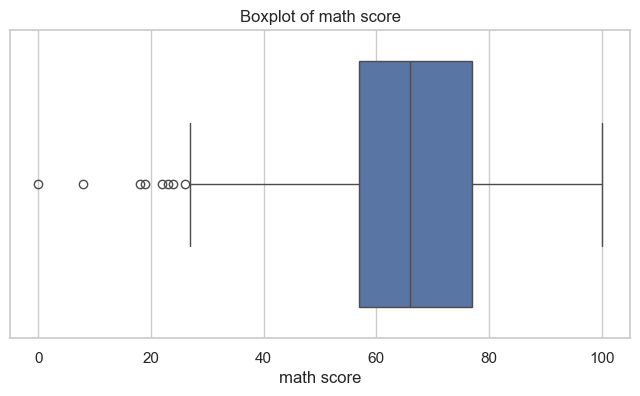

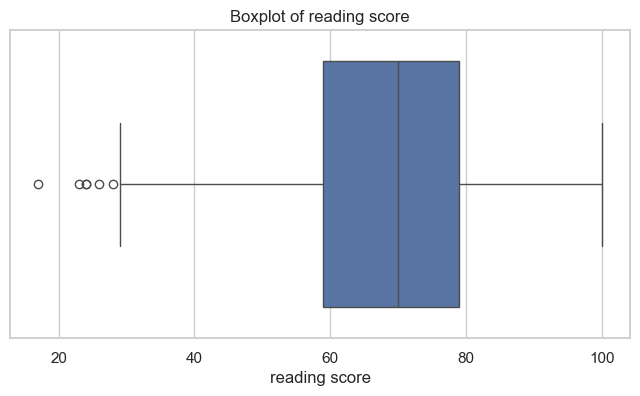

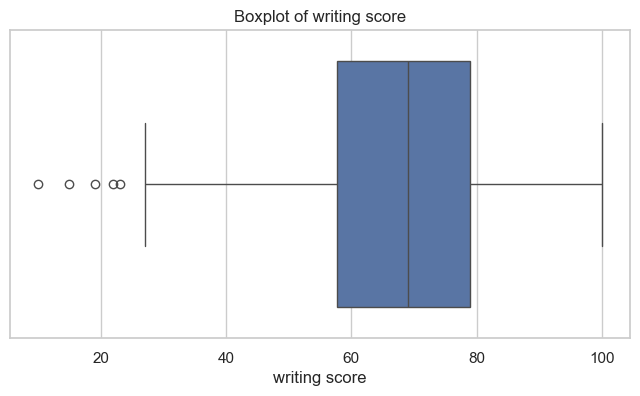

In [ ]:
# Plot boxplots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


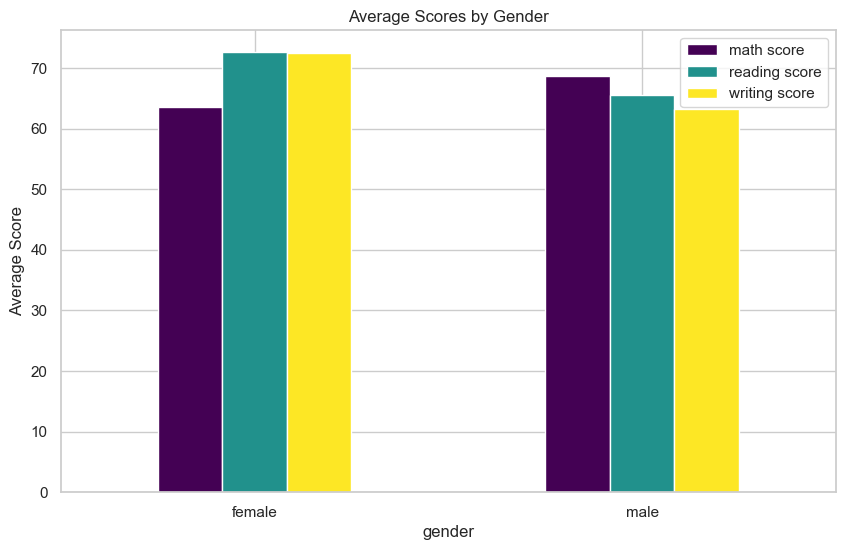

In [ ]:
score_cols = ['math score', 'reading score', 'writing score']
df.groupby('gender')[score_cols].mean().plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_5812\1114291110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set3')


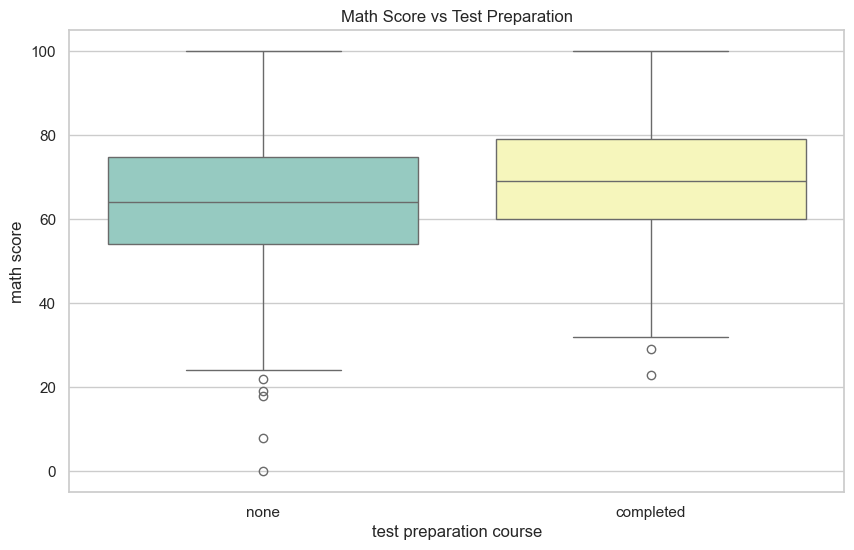

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set3')
plt.title("Math Score vs Test Preparation")
plt.show()


In [ ]:
# code for explanatory analysis
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nUnique values in categorical columns:\n")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")


Dataset Shape: (1000, 8)

Columns:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Unique values in categorical columns:

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


Average Scores by Gender:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


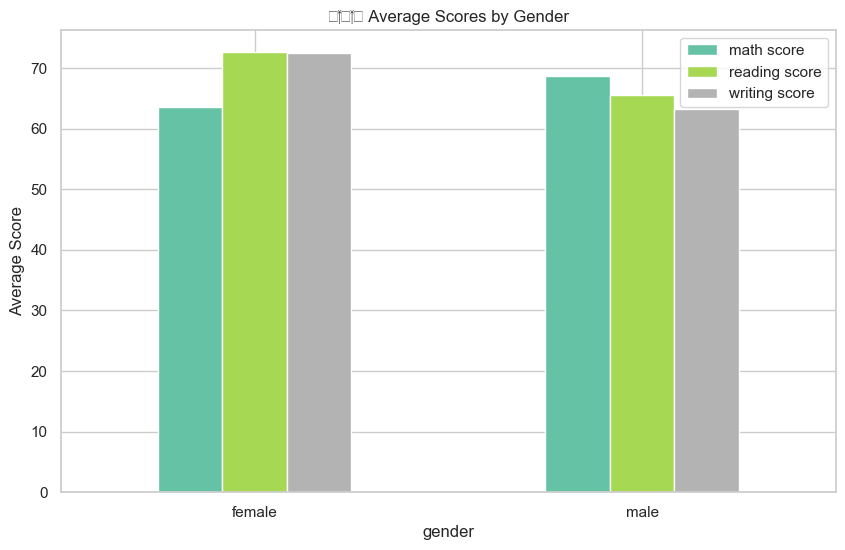

In [ ]:
gender_avg = df.groupby('gender')[score_cols].mean()
print("Average Scores by Gender:\n", gender_avg)

# Plot
gender_avg.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("🧑‍🤝‍🧑 Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


Average Scores by Test Preparation:
                          math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


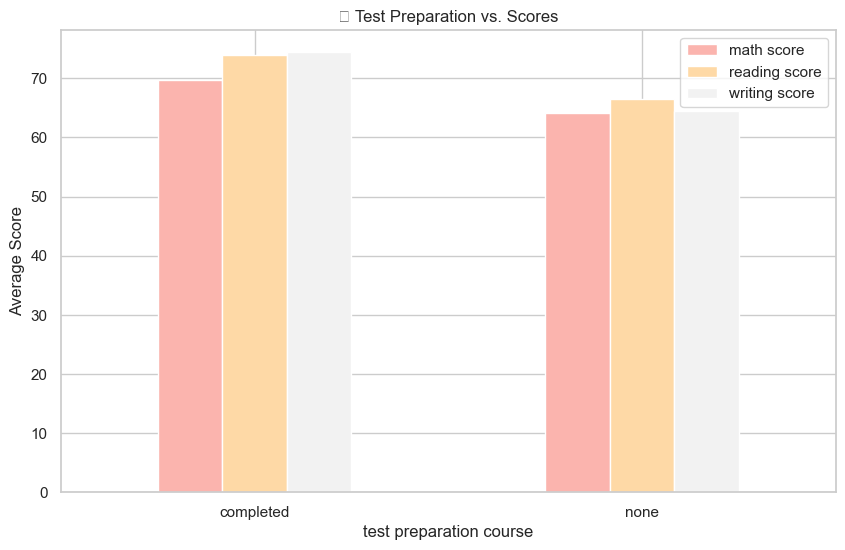

In [ ]:
prep_avg = df.groupby('test preparation course')[score_cols].mean()
print("Average Scores by Test Preparation:\n", prep_avg)

# Plot
prep_avg.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
plt.title("🎓 Test Preparation vs. Scores")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5812\1057154632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set2')
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


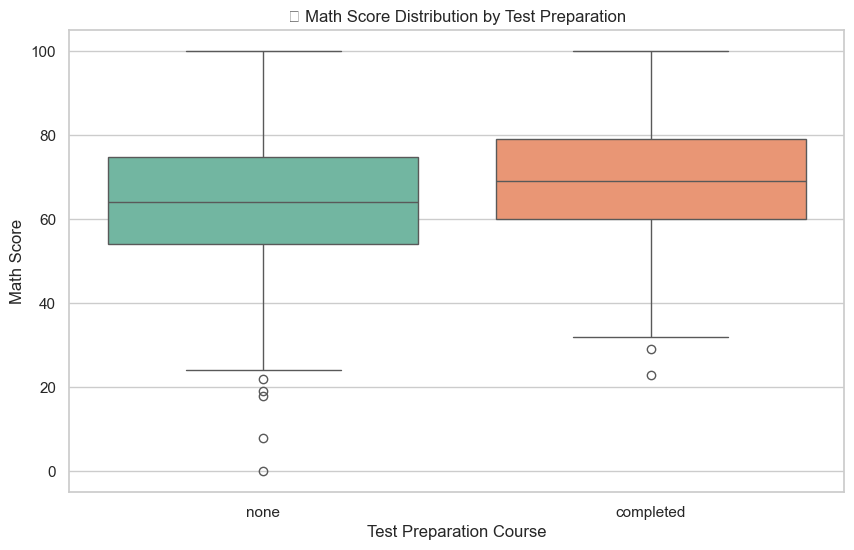

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set2')
plt.title("📊 Math Score Distribution by Test Preparation")
plt.ylabel("Math Score")
plt.xlabel("Test Preparation Course")
plt.show()


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


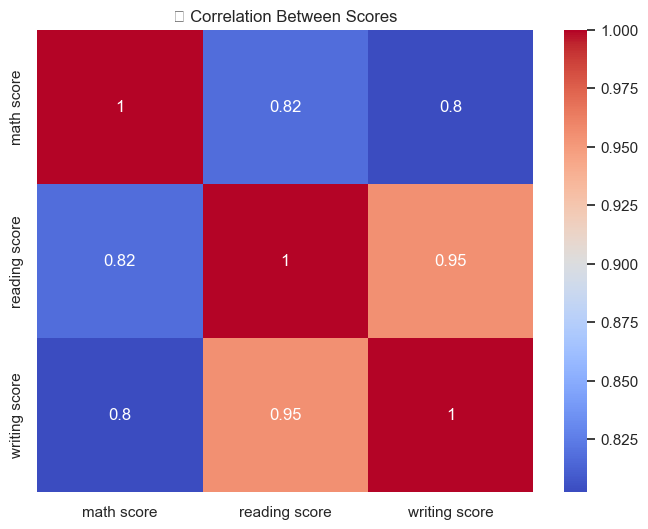

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation Between Scores")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5812\331750155.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='parental level of education', y='math score', ci=None, palette='Set3')
C:\Users\hp\AppData\Local\Temp\ipykernel_5812\331750155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='parental level of education', y='math score', ci=None, palette='Set3')
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


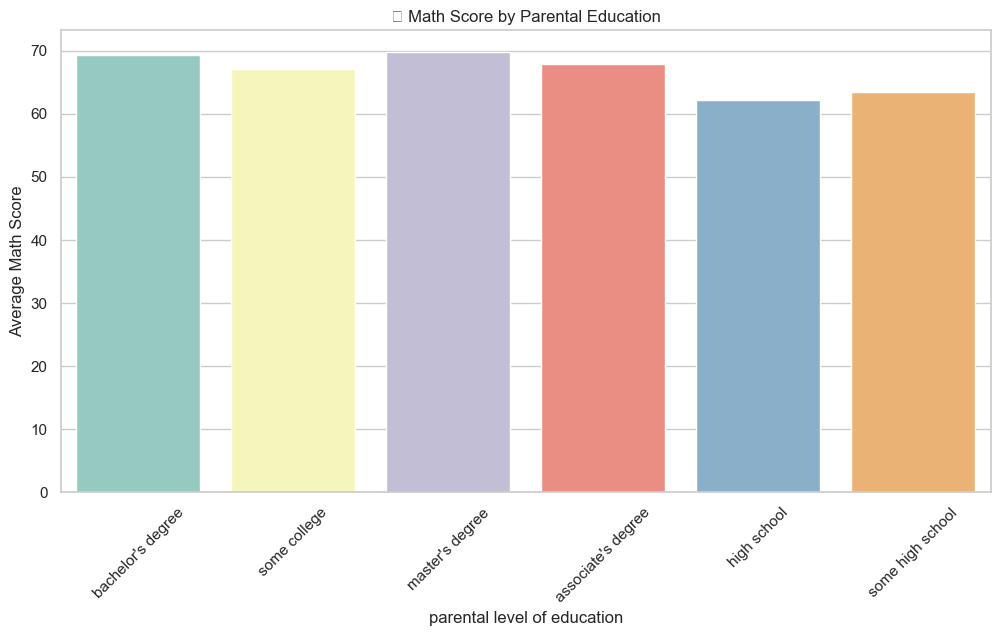

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='parental level of education', y='math score', ci=None, palette='Set3')
plt.title("📚 Math Score by Parental Education")
plt.xticks(rotation=45)
plt.ylabel("Average Math Score")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5812\837792176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='lunch', y='writing score', palette='Set1')
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


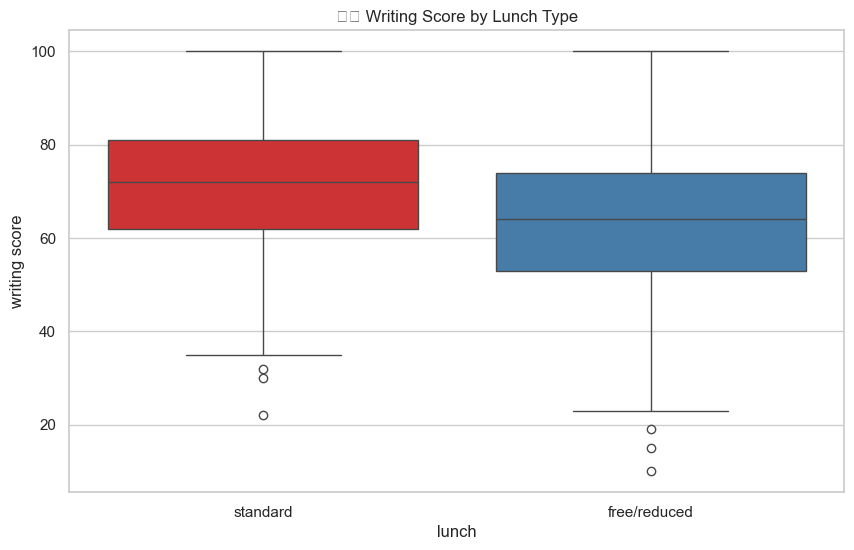

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lunch', y='writing score', palette='Set1')
plt.title("🍽️ Writing Score by Lunch Type")
plt.show()


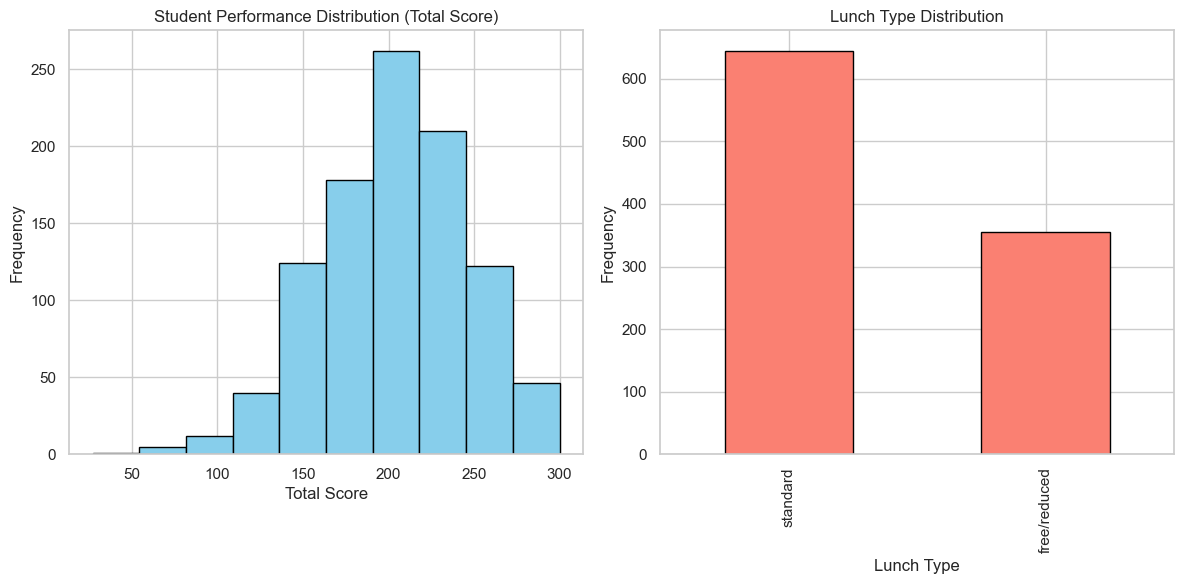

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly load the dataset (use file path directly, not the DataFrame)
file_path = r"C:\Users\hp\Desktop\para.txt\StudentsPerformance.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Create a composite score by combining math, reading, and writing scores
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Create a histogram for the total performance score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First plot for performance score
plt.hist(df['total_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Student Performance Distribution (Total Score)')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

# Create a histogram for lunch type distribution
plt.subplot(1, 2, 2)  # Second plot for lunch type
df['lunch'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Lunch Type Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


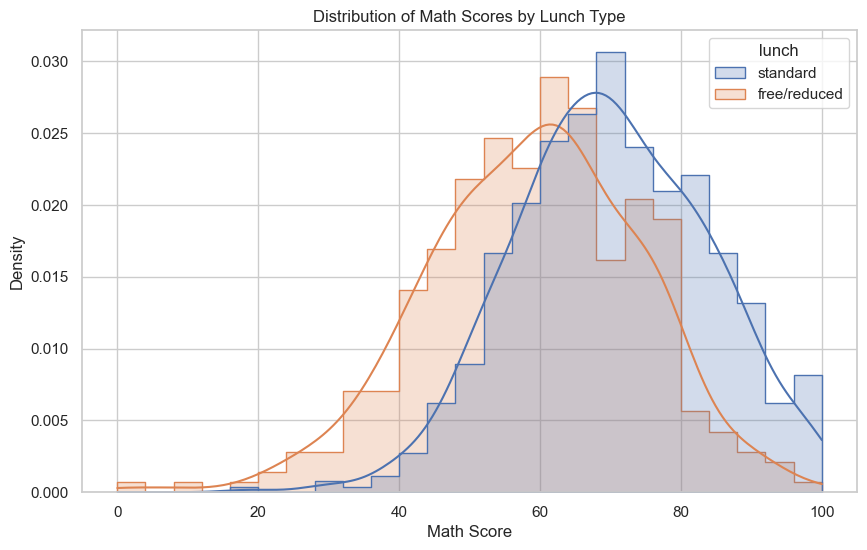

In [ ]:
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
sns.histplot(data=df, x='math score', hue='lunch', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Math Scores by Lunch Type')
plt.xlabel('Math Score')
plt.ylabel('Density') # Label y-axis as Density when using stat="density"
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
weeks = list(range(1,11))
group_a=[2.1,1.0,7,2.0,2.2,1.6,2.,2.1,2,1.9,2.1]
group_b=[2.8,2.6,2.7,2.9,2.5,2.6,3.0,2.8,2.7,2.9]
avg_time=[(a+b/2 for a,b in zip(group_a,group_b))]
mean=np.mean(avg_time)
std_dev=np.std(avg_time)
ucl=mean + 3 * std_dev

lcl=mean - 3 * std_dev
plt.figure
plt.plot(weeks,avg_time, marker="o" ,color="purpl",label='average time(all students)')
plt.axhline(mean, color='green', linestyle='--', label='mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL')
plt.axhline(lcl, color='blue', linestyle='--', label='LCL')
plt.title('Average time spent on homework by students')
plt.xlabel('Weeks')

